In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data_frame = pd.read_csv(r".\data\tracks.csv")

In [6]:
sorted_data_frame_by_popularity = data_frame.sort_values('popularity', ascending=False)
release_date = sorted_data_frame_by_popularity.release_date
year = []
for date in release_date:
    year.append(int(date[:4]))
sorted_data_frame_by_popularity['release_year'] = year

sorted_before_90 = sorted_data_frame_by_popularity[sorted_data_frame_by_popularity.release_year < 1990]
sorted_after_90 = sorted_data_frame_by_popularity[sorted_data_frame_by_popularity.release_year >= 1990]

In [7]:
popular_songs = sorted_data_frame_by_popularity.head(200)
popular_songs

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,...,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4,2021
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,...,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4,2021
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,...,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4,2021
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,...,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4,2020
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,...,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92963,6qraVL4IJaIj0IuEexYJNa,Explícito,85,195066,1,['Myke Towers'],['7iK8PXO48WeuP03g8YR51W'],2020-12-15,0.828,0.830,...,-3.371,1,0.0470,0.34800,0.000016,0.0613,0.422,95.007,4,2020
92981,73nAK3HgQK8dak83Y2WQ8F,Vida de Rico,85,187427,0,['Camilo'],['28gNT5KBp7IjEOQoevXf9N'],2020-09-21,0.824,0.457,...,-5.428,1,0.0543,0.16700,0.000000,0.0410,0.950,87.977,4,2020
92967,02MWAaffLxlfxAUY7c5dvx,Heat Waves,85,238805,0,['Glass Animals'],['4yvcSjfu4PC0CYQyLy4wSq'],2020-08-06,0.761,0.525,...,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.531,80.870,4,2020
92969,7D7EH7MGyNHWSkqrszerI1,BEBÉ,85,198707,0,"['Camilo', 'El Alfa']","['28gNT5KBp7IjEOQoevXf9N', '2oQX8QiMXOyuqbcZEF...",2020-11-25,0.862,0.720,...,-4.048,1,0.0379,0.48700,0.000001,0.0604,0.965,129.972,4,2020


In [8]:
all_songs_label = sorted_data_frame_by_popularity[['explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
popular_songs_label = popular_songs[['explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]

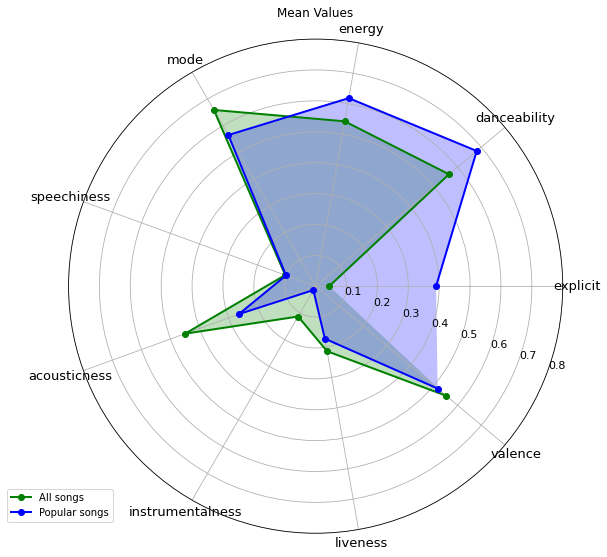

In [9]:
labels = list(all_songs_label)

stats_all = all_songs_label.mean().tolist()
stats_popular = popular_songs_label.mean().tolist()

radar_angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
fig = plt.figure(figsize = (20,20))

ax = fig.add_subplot(221, polar=True)
ax.plot(radar_angles, stats_all, 'o-', linewidth=2, label='All songs', color='green')
ax.fill(radar_angles, stats_all, alpha=0.25, facecolor='green')
ax.set_thetagrids(radar_angles*180/np.pi, labels, fontsize=13)

ax.set_rlabel_position(340)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8], ['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8'], size=11)
plt.ylim(0, 0.8)

ax.plot(radar_angles, stats_popular, 'o-', linewidth=2, label='Popular songs', color='blue')
ax.fill(radar_angles, stats_popular, alpha=0.25, facecolor='blue')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

Text(0.5, 1.0, 'Energy')

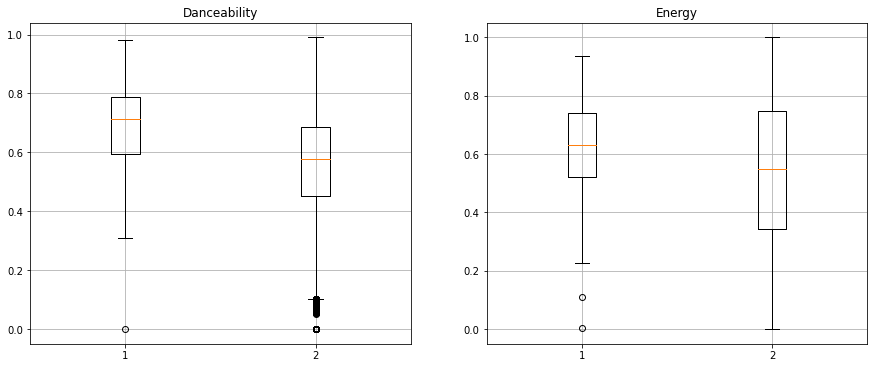

In [10]:
danceability_all_songs = sorted_data_frame_by_popularity['danceability'].tolist()
danceability_popular = popular_songs['danceability'].tolist()

energy_all_songs = sorted_data_frame_by_popularity['energy'].tolist()
energy_popular = popular_songs['energy'].tolist()

fig = plt.figure(figsize=(15, 13))
ax1 = fig.add_subplot(221)
ax1.boxplot([danceability_popular, danceability_all_songs])
ax1.grid(True)
ax1.set_title('Danceability')

ax2 = fig.add_subplot(222)
ax2.boxplot([energy_popular, energy_all_songs])
ax2.grid(True)
ax2.set_title('Energy')

Text(0.5, 1.0, 'Valence')

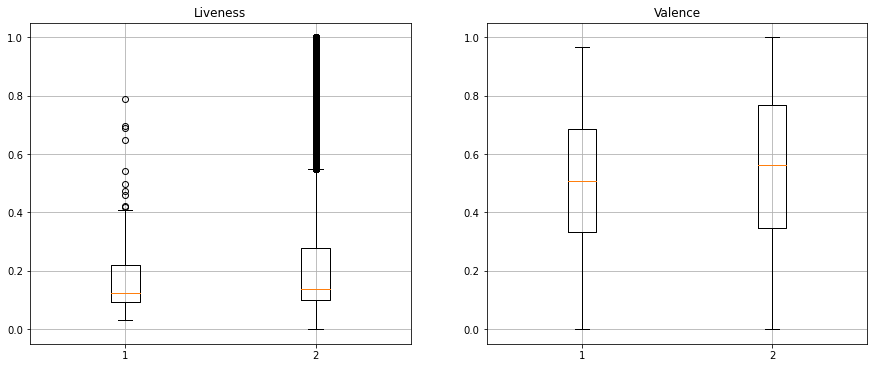

In [12]:
liveness_all_songs = sorted_data_frame_by_popularity['liveness'].tolist()
liveness_popular = popular_songs['liveness'].tolist()

valence_all_songs = sorted_data_frame_by_popularity['valence'].tolist()
valence_popular = popular_songs['valence'].tolist()

fig = plt.figure(figsize=(15, 13))
ax1 = fig.add_subplot(221)
ax1.boxplot([liveness_popular, liveness_all_songs])
ax1.grid(True)
ax1.set_title('Liveness')

ax2 = fig.add_subplot(222)
ax2.boxplot([valence_popular, valence_all_songs])
ax2.grid(True)
ax2.set_title('Valence')

In [128]:
import random
from random import randint

picked_songs = []
for i in range(200):
    rand_val = randint(200, len(data_frame))
    picked_songs.append(rand_val)

randomly_picked_songs = pd.DataFrame(columns=['explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence'])

for i in picked_songs:
    randomly_picked_songs = randomly_picked_songs.append({'explicit': sorted_data_frame_by_popularity.iloc[i, 4], 'danceability': sorted_data_frame_by_popularity.iloc[i, 8], 'energy':sorted_data_frame_by_popularity.iloc[i, 9], 'mode':sorted_data_frame_by_popularity.iloc[i, 10], 'speechiness':sorted_data_frame_by_popularity.iloc[i, 11], 'acousticness':sorted_data_frame_by_popularity.iloc[i, 12], 'instrumentalness':sorted_data_frame_by_popularity.iloc[i, 13], 'liveness':sorted_data_frame_by_popularity.iloc[i, 14], 'valence':sorted_data_frame_by_popularity.iloc[i, 15] }, ignore_index=True)

Text(0, 0.5, 'Energy')

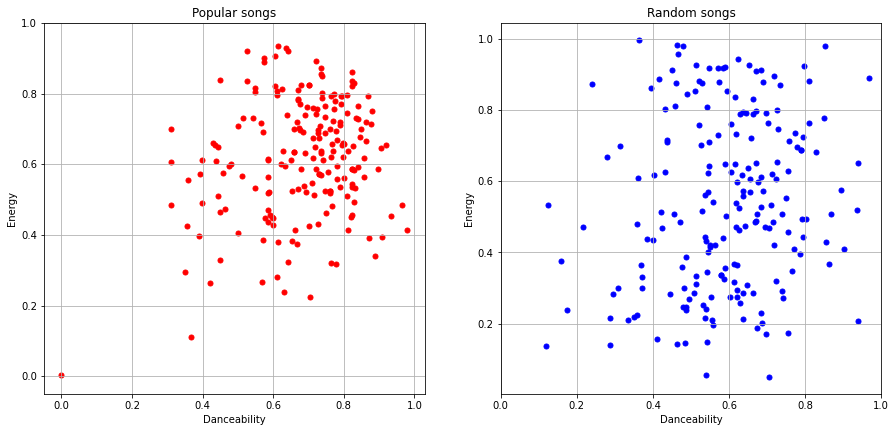

In [129]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.scatter(popular_songs.danceability, popular_songs.energy, s=25, c='red')
ax1.grid(True)
ax1.set_title('Popular songs')
plt.ylim(-0.05, 1.0)
plt.xlabel('Danceability')
plt.ylabel('Energy')

ax2 = fig.add_subplot(222)
ax2.scatter(randomly_picked_songs.danceability, randomly_picked_songs.energy, s=25, c='blue')
ax2.grid(True)
ax2.set_title('Random songs')
plt.xlim(0.0, 1.0)
plt.xlabel('Danceability')
plt.ylabel('Energy')

Text(0.5, 0, 'Energy')

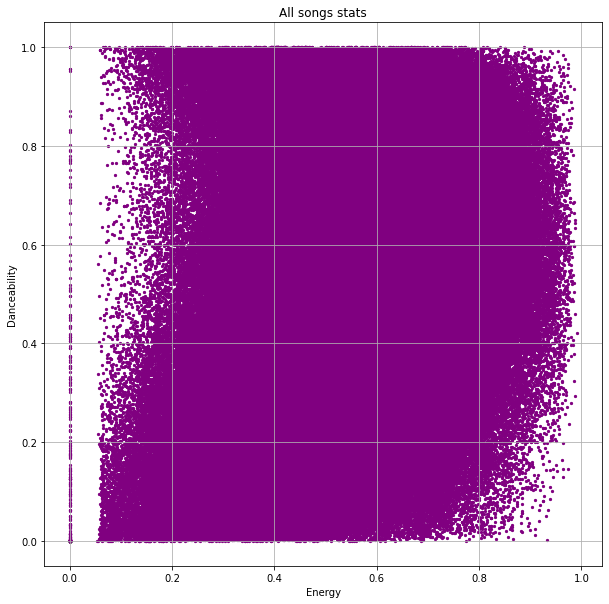

In [116]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(sorted_data_frame_by_popularity.danceability, sorted_data_frame_by_popularity.energy, s=5, c='purple')
ax.grid(True)
ax.set_title('All songs stats')
plt.ylabel('Danceability')
plt.xlabel('Energy')

In [132]:
np.corrcoef(popular_songs.danceability, popular_songs.energy)

array([[1.        , 0.22268978],
       [0.22268978, 1.        ]])

In [133]:
np.corrcoef(sorted_data_frame_by_popularity.danceability, sorted_data_frame_by_popularity.energy)

array([[1.        , 0.24156328],
       [0.24156328, 1.        ]])

In [134]:
from scipy import stats
print(f"Popular songs correlation of danceability and energy {stats.pearsonr(popular_songs.danceability, popular_songs.energy)}")
print(f"Randomly picked songs correlation {stats.pearsonr(randomly_picked_songs.danceability, randomly_picked_songs.energy)}")

Popular songs correlation of danceability and energy (0.22268977509512966, 0.001527205375553949)
Randomly picked songs correlation (0.1575363073046074, 0.02588951204898064)


Text(0, 0.5, 'Liveness')

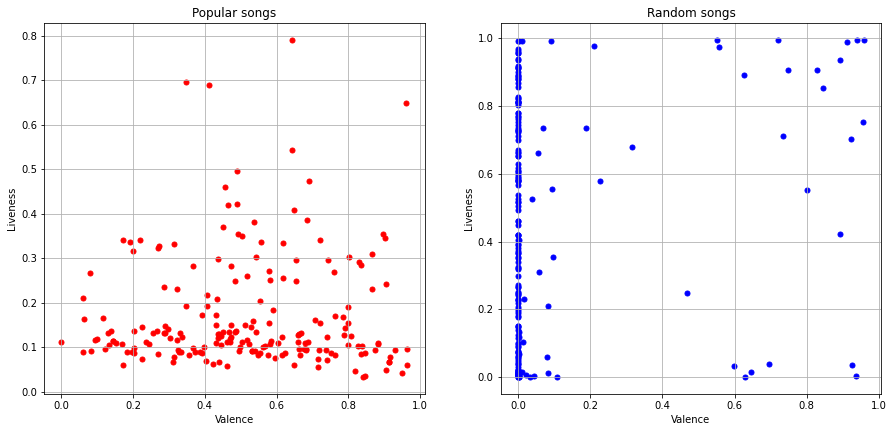

In [135]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.scatter(popular_songs.valence, popular_songs.liveness, s=25, c='red')
ax1.grid(True)
ax1.set_title('Popular songs')
plt.xlabel('Valence')
plt.ylabel('Liveness')

ax2 = fig.add_subplot(222)
ax2.scatter(randomly_picked_songs.valence, randomly_picked_songs.liveness, s=25, c='blue')
ax2.grid(True)
ax2.set_title('Random songs')
plt.xlabel('Valence')
plt.ylabel('Liveness')

Text(0, 0.5, 'Liveness')

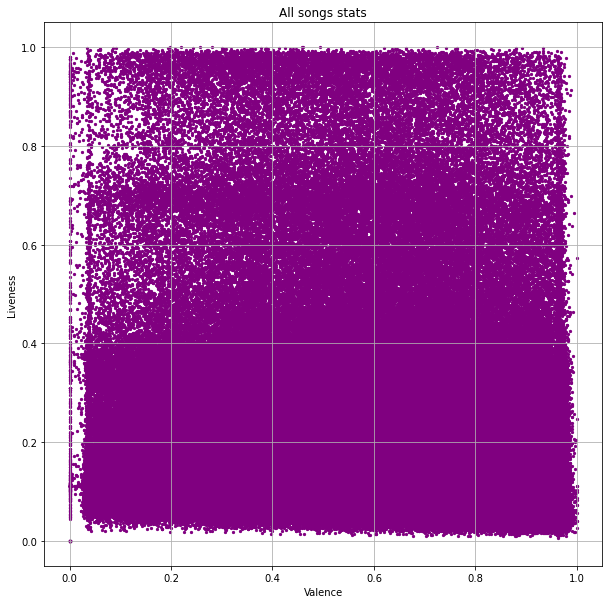

In [149]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(sorted_data_frame_by_popularity.valence, sorted_data_frame_by_popularity.liveness, s=5, c='purple')
ax.grid(True)
ax.set_title('All songs stats')
plt.xlabel('Valence')
plt.ylabel('Liveness')

In [144]:
np.corrcoef(popular_songs.valence, popular_songs.liveness)

array([[1.        , 0.02526923],
       [0.02526923, 1.        ]])

In [145]:
np.corrcoef(randomly_picked_songs.valence, randomly_picked_songs.liveness)

array([[1.        , 0.20177531],
       [0.20177531, 1.        ]])

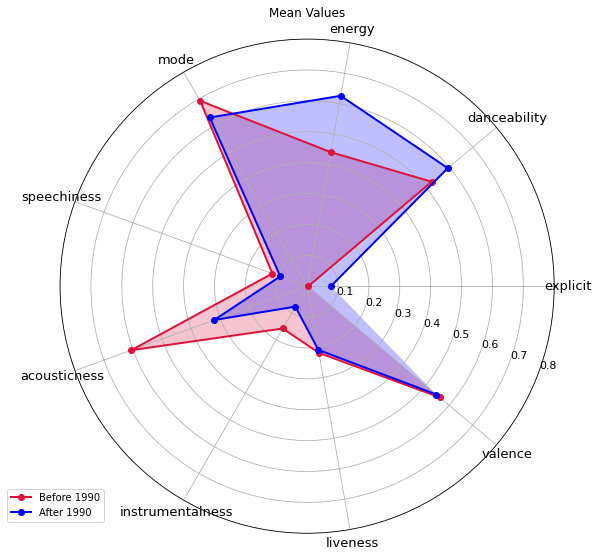

In [158]:
before_90_stats = sorted_before_90[['explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
after_90_stats = sorted_after_90[['explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]

before_90_stats = before_90_stats.mean().tolist()
after_90_stats = after_90_stats.mean().tolist()

radar_angles = np.linspace(0, 2*np.pi, len(before_90_stats), endpoint=False)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(221, polar=True)
ax.plot(radar_angles, before_90_stats, 'o-', linewidth=2, label='Before 1990', color='crimson')
ax.fill(radar_angles, before_90_stats, alpha=0.25, facecolor='crimson')
ax.set_thetagrids(radar_angles*180/np.pi, labels, fontsize=13)

ax.set_rlabel_position(340)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8], ['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8'], size=11)
plt.ylim(0, 0.8)

ax.plot(radar_angles, after_90_stats, 'o-', linewidth=2, label='After 1990', color='blue')
ax.fill(radar_angles, after_90_stats, alpha=0.25, facecolor='blue')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))